In [1]:
from utils.logger import Logger
import torch
import matplotlib

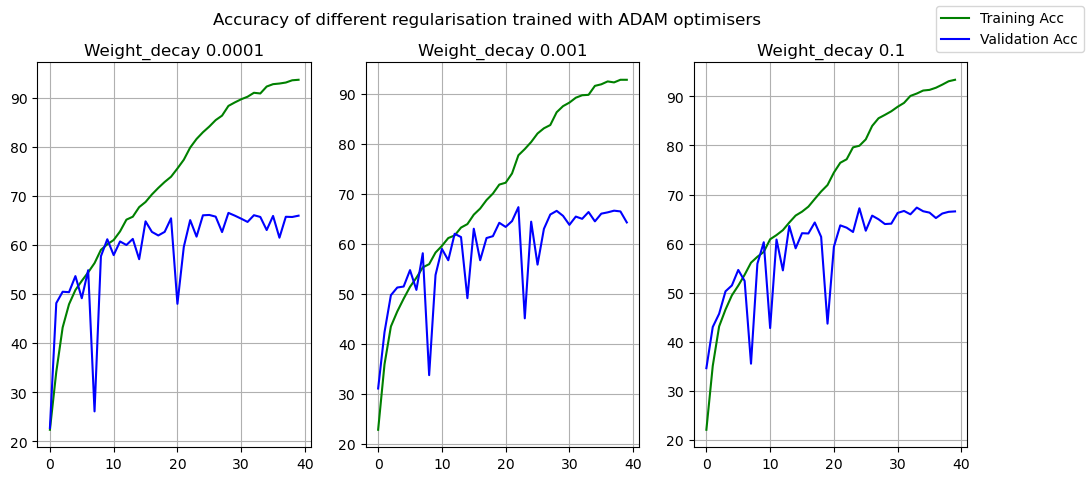

In [5]:
logger = Logger()

acc_plt = matplotlib.pyplot

acc_fig, acc_axs = acc_plt.subplots(1, 3, figsize=(12, 5))


acc_axs = acc_axs.flatten()

for ax, col in zip(acc_axs, ['Weight_decay 0.0001', 'Weight_decay 0.001', 'Weight_decay 0.1']):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, 5),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

weight_decays = [0.0001, 0.001, 0.1]
for i, wd in enumerate(weight_decays):
    # net = VGG(arch=archs[name]) if j != 2 else vgg_16_pt
    path = f'./checkpoints/VGG_16_Adam_{wd}/epoch_40'
    checkpoint = torch.load(path)
    # net.load_state_dict(checkpoint["params"])
    logger.restore_logs(checkpoint['logs'])

    acc_axs[i].plot(logger.acc_train, 'g', label='Training Acc')
    acc_axs[i].plot(logger.acc_val, 'b', label='Validation Acc')
    acc_axs[i].grid()

acc_fig.suptitle('Accuracy of different regularisation trained with ADAM optimisers')
handles, labels = acc_axs[0].get_legend_handles_labels()
acc_fig.legend(handles, labels)

acc_plt.show()
